In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('SoccerPlayersData.csv')

In [3]:
data.shape

(22555, 47)

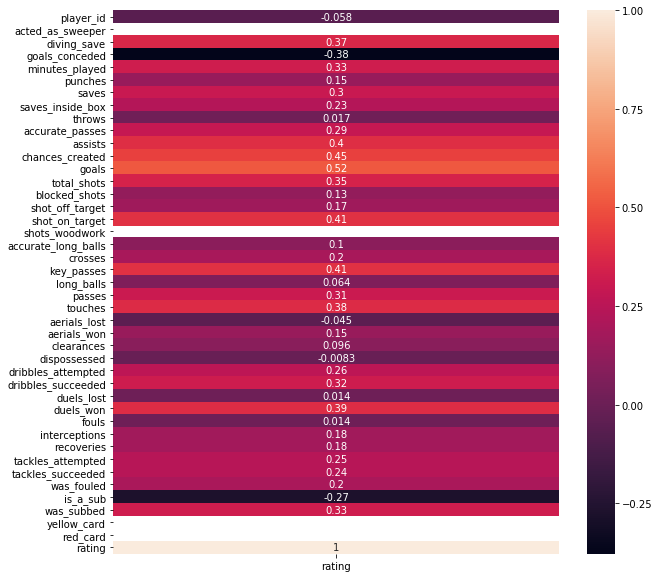

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr()[['rating']], annot=True)
plt.show()

In [5]:
data.head()

,player_id,name,role,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,shots_woodwork,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,0.0,1.0,0.0,51,0.0,2.0,0.0,0.0,14,NaN,NaN,NaN,NaN,0,0,0%,0,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,NaN,NaN,6.2
1,38807,James Milner,Midfielder,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,67%,0,0,0%,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,NaN,NaN,NaN
2,303339,Sadio Mané,Attacker,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,9,0.0,0.0,0.0,82%,0,0,0%,0,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0.0,NaN,NaN,6.1
3,319784,Alisson Becker,Keeper,0.0,1.0,0.0,39,0.0,2.0,0.0,1.0,9,NaN,NaN,NaN,NaN,0,0,0%,0,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1.0,NaN,NaN,6.2
4,760712,Trent Alexander-Arnold,Defender,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,24,1.0,2.0,0.0,60%,2,0,50%,1,1,0,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,NaN,NaN,NaN,7.7


In [6]:
data = data.drop(['acted_as_sweeper', 'shots_woodwork'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
player_id              22555 non-null int64
name                   22555 non-null object
role                   22549 non-null object
diving_save            1615 non-null float64
goals_conceded         1615 non-null float64
minutes_played         22555 non-null int64
punches                1615 non-null float64
saves                  1615 non-null float64
saves_inside_box       1615 non-null float64
throws                 1615 non-null float64
accurate_passes        22555 non-null int64
assists                20940 non-null float64
chances_created        20940 non-null float64
goals                  20940 non-null float64
pass_success           20940 non-null object
total_shots            22555 non-null int64
blocked_shots          22555 non-null int64
shot_accuracy          22555 non-null object
shot_off_target        22555 non-null int64
shot_on_target         22555 non-null i

In [8]:
float_to_int_columns = ['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists',
                       'chances_created', 'goals', 'was_subbed', 'yellow_card', 'red_card']

for col in float_to_int_columns:
    data[col] = data[col].astype(pd.Int64Dtype())

In [9]:
train = data
train.head()

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,1,0,51,0,2,0,0,14,NaN,NaN,NaN,NaN,0,0,0%,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN,6.2
1,38807,James Milner,Midfielder,NaN,NaN,4,NaN,NaN,NaN,NaN,2,0,0,0,67%,0,0,0%,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN
2,303339,Sadio Mané,Attacker,NaN,NaN,16,NaN,NaN,NaN,NaN,9,0,0,0,82%,0,0,0%,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,NaN,NaN,6.1
3,319784,Alisson Becker,Keeper,1,0,39,0,2,0,1,9,NaN,NaN,NaN,NaN,0,0,0%,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,NaN,NaN,6.2
4,760712,Trent Alexander-Arnold,Defender,NaN,NaN,90,NaN,NaN,NaN,NaN,24,1,2,0,60%,2,0,50%,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,NaN,NaN,NaN,7.7


In [10]:
toFindPassIndexes = train[(train.pass_success==0) & (train.passes > 0)].index.values

train['pass_success'] = train['pass_success'].str.rstrip('%').astype('float') / 100.0
train['shot_accuracy'] = train['shot_accuracy'].str.rstrip('%').astype('float') / 100.0

for passAccIndex in toFindPassIndexes:
    if train.loc[passAccIndex, 'passes'] > 0:
        train.at[passAccIndex, 'pass_success'] = train.loc[passAccIndex, 'accurate_passes'] / train.loc[passAccIndex, 'passes']

train['pass_success'] = train['pass_success'].fillna(0).astype('float')

In [11]:
train.head()

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,1,0,51,0,2,0,0,14,NaN,NaN,NaN,0.00,0,0,0.0,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN,6.2
1,38807,James Milner,Midfielder,NaN,NaN,4,NaN,NaN,NaN,NaN,2,0,0,0,0.67,0,0,0.0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN
2,303339,Sadio Mané,Attacker,NaN,NaN,16,NaN,NaN,NaN,NaN,9,0,0,0,0.82,0,0,0.0,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,NaN,NaN,6.1
3,319784,Alisson Becker,Keeper,1,0,39,0,2,0,1,9,NaN,NaN,NaN,0.00,0,0,0.0,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,NaN,NaN,6.2
4,760712,Trent Alexander-Arnold,Defender,NaN,NaN,90,NaN,NaN,NaN,NaN,24,1,2,0,0.60,2,0,0.5,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,NaN,NaN,NaN,7.7


In [12]:
train[['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created', 'goals', 'pass_success', 'was_subbed', 'yellow_card', 'red_card']] = train[['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created', 'goals', 'pass_success', 'was_subbed', 'yellow_card', 'red_card']].fillna(value=0)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
player_id              22555 non-null int64
name                   22555 non-null object
role                   22549 non-null object
diving_save            22555 non-null Int64
goals_conceded         22555 non-null Int64
minutes_played         22555 non-null int64
punches                22555 non-null Int64
saves                  22555 non-null Int64
saves_inside_box       22555 non-null Int64
throws                 22555 non-null Int64
accurate_passes        22555 non-null int64
assists                22555 non-null Int64
chances_created        22555 non-null Int64
goals                  22555 non-null Int64
pass_success           22555 non-null float64
total_shots            22555 non-null int64
blocked_shots          22555 non-null int64
shot_accuracy          22555 non-null float64
shot_off_target        22555 non-null int64
shot_on_target         22555 non-null int64
accur

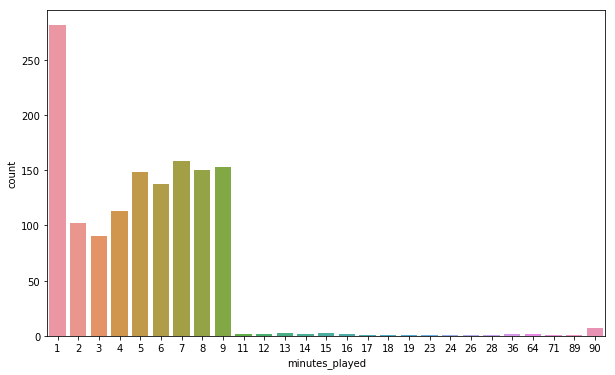

In [14]:
plt.figure(figsize=(10, 6))
rating_df = train[train.rating.isna()][['minutes_played']]
null_mp_df = rating_df.groupby(['minutes_played']).minutes_played.agg('count').to_frame('count').reset_index()
sns.barplot(x='minutes_played', y='count', data=null_mp_df)

In [15]:
missingrole = train[train['role'].isnull()]
missingrole

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
11096,451941,Unai Garcia,NaN,0,0,18,0,0,0,0,2,0,0,0,1.00,0,0,0.0,0,0,2,0,0,2,2,9,1,1,5,0,1,1,1,2,0,0,0,0,0,0,1,0,0,0,6.3
12088,451941,Unai Garcia,NaN,0,0,90,0,0,0,0,33,0,0,1,0.85,2,0,0.5,1,1,2,0,0,5,39,50,2,0,1,0,1,1,2,1,0,1,7,0,0,0,0,0,0,0,6.0
12941,451941,Unai Garcia,NaN,0,0,67,0,0,0,0,10,0,0,0,0.53,0,0,0.0,0,0,3,1,0,5,19,39,1,8,5,0,0,0,2,10,0,2,3,1,1,1,0,1,0,0,6.5
13421,451941,Unai Garcia,NaN,0,0,90,0,0,0,0,26,0,0,0,0.63,0,0,0.0,0,0,7,1,0,14,41,55,1,7,4,0,0,0,2,9,0,3,6,2,2,0,0,0,0,0,7.5
21369,1069936,Abraham Odoh,NaN,0,0,90,0,0,0,0,11,0,0,0,0.65,1,0,1.0,0,1,0,1,0,1,17,27,2,0,0,0,1,0,4,4,1,0,4,1,1,3,0,0,0,0,6.1
22188,934299,Morgan Roberts,NaN,0,0,3,0,0,0,0,0,0,0,0,0.00,0,0,0.0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,NaN


In [16]:
train.loc[[12088]]

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
12088,451941,Unai Garcia,NaN,0,0,90,0,0,0,0,33,0,0,1,0.85,2,0,0.5,1,1,2,0,0,5,39,50,2,0,1,0,1,1,2,1,0,1,7,0,0,0,0,0,0,0,6.0


In [17]:
train.at[11096, 'role'] = 'Defender'
train.at[12088, 'role'] = 'Defender'
train.at[12941, 'role'] = 'Defender'
train.at[13421, 'role'] = 'Defender'
train.at[21369, 'role'] = 'Midfielder'
train.at[22188, 'role'] = 'Midfielder'

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
player_id              22555 non-null int64
name                   22555 non-null object
role                   22555 non-null object
diving_save            22555 non-null Int64
goals_conceded         22555 non-null Int64
minutes_played         22555 non-null int64
punches                22555 non-null Int64
saves                  22555 non-null Int64
saves_inside_box       22555 non-null Int64
throws                 22555 non-null Int64
accurate_passes        22555 non-null int64
assists                22555 non-null Int64
chances_created        22555 non-null Int64
goals                  22555 non-null Int64
pass_success           22555 non-null float64
total_shots            22555 non-null int64
blocked_shots          22555 non-null int64
shot_accuracy          22555 non-null float64
shot_off_target        22555 non-null int64
shot_on_target         22555 non-null int64
accur

In [19]:
toDeleteNullRatingIndexes = train[(train.rating.isnull()) & (train.minutes_played > 10)].index.values
train = train.drop(toDeleteNullRatingIndexes)

In [20]:
yc_rc_indexes = train[(train.rating.isnull()) & (train.yellow_card == 1.0) & (train.red_card == 1.0)].index.values
for yc_rc_index in yc_rc_indexes:
    train.at[yc_rc_index, 'rating'] = 2.0
    
rc_indexes = train[(train.rating.isnull()) & (train.yellow_card == 0.0) & (train.red_card == 1.0)].index.values
for rc_index in rc_indexes:
    train.at[rc_index, 'rating'] = 3.0
    
yc_indexes = train[(train.rating.isnull()) & (train.yellow_card == 1.0) & (train.red_card == 0.0)].index.values
for yc_index in yc_indexes:
    train.at[yc_index, 'rating'] = 4.0

nice_indexes = train[(train.rating.isnull()) & (train.goals >= 1.0) | (train.assists >= 1.0) | (train.saves >= 1.0) | (train.key_passes >= 1.0) | (train.chances_created >= 1.0)].index.values
for nice_index in nice_indexes:
    train.at[nice_index, 'rating'] = 6.0
    
contributed_null_indexes = train[train.rating.isnull()].index.values
for cn_index in contributed_null_indexes:
    train.at[cn_index, 'rating'] = 5.0

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train['minutes_played'] = scaler.fit_transform(train[['minutes_played']])

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
train.head()
# clear, def
# dispos, dribbles,  possession

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,1,0,0.420168,0,2,0,0,14,0,0,0,0.00,0,0,0.0,0,0,4,0,0,8,18,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,6.0
1,38807,James Milner,Midfielder,0,0,0.025210,0,0,0,0,2,0,0,0,0.67,0,0,0.0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0
2,303339,Sadio Mané,Attacker,0,0,0.126050,0,0,0,0,9,0,0,0,0.82,0,0,0.0,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,0,0,6.1
3,319784,Alisson Becker,Keeper,1,0,0.319328,0,2,0,1,9,0,0,0,0.00,0,0,0.0,0,0,1,0,0,2,11,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,6.0
4,760712,Trent Alexander-Arnold,Defender,0,0,0.747899,0,0,0,0,24,1,2,0,0.60,2,0,0.5,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,0,0,0,6.0


In [23]:
player_train = train.drop(train[train.role=='Keeper'].index.values)
keeper_train = train[train.role=='Keeper']
player_train = player_train.reset_index()
keeper_train = keeper_train.reset_index()
player_train = player_train.drop(['index'], axis=1)
keeper_train = keeper_train.drop(['index'], axis=1)
player_train = player_train.drop(['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws'], axis=1)
keeper_train = keeper_train.drop(['assists', 'chances_created', 'goals', 'crosses', 'blocked_shots'], axis=1)

In [24]:
player_train = player_train.drop(['player_id', 'name'], axis=1)
keeper_train = keeper_train.drop(['player_id', 'name', 'role'], axis=1)
player_train = pd.get_dummies(data=player_train, columns=['role'])
player_train.head()

,minutes_played,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,shot_on_target,accurate_long_balls,crosses,key_passes,long_balls,passes,touches,aerials_lost,aerials_won,clearances,dispossessed,dribbles_attempted,dribbles_succeeded,duels_lost,duels_won,fouls,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating,role_Attacker,role_Defender,role_Midfielder
0,0.025210,2,0,0,0,0.67,0,0,0.0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5.0,0,0,1
1,0.126050,9,0,0,0,0.82,0,0,0.0,0,0,0,0,0,0,11,13,0,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,0,0,6.1,1,0,0
2,0.747899,24,1,2,0,0.60,2,0,0.5,1,1,4,8,3,10,40,73,0,1,1,1,1,0,4,2,1,2,7,1,1,0,0,0,0,0,6.0,0,1,0
3,0.747899,45,0,0,0,0.83,0,0,0.0,0,0,2,0,1,6,54,60,0,4,0,0,0,0,2,6,2,0,4,2,1,0,0,0,0,0,6.0,0,1,0
4,0.747899,50,0,0,1,0.88,1,0,1.0,0,1,3,0,0,5,57,71,1,5,3,0,0,0,1,8,0,5,3,3,1,0,0,0,0,0,8.4,0,1,0


In [25]:
player_train.assists = player_train.assists.astype('int64')
player_train.chances_created = player_train.chances_created.astype('int64')
player_train.goals = player_train.goals.astype('int64')
player_train.was_subbed = player_train.was_subbed.astype('int64')
player_train.yellow_card = player_train.yellow_card.astype('int64')
player_train.red_card = player_train.red_card.astype('int64')

In [26]:
x_player_train = player_train.drop(['rating'], axis=1)
y_player_train = player_train['rating']
x_keeper_train = keeper_train.drop(['rating'], axis=1)
y_keeper_train = keeper_train['rating']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_player_train, y_player_train, test_size=0.2)

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.7, max_depth = 5, alpha = 10, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.308705


In [105]:
preds = pd.DataFrame(preds)

In [106]:
preds.head()

,0
0,5.997624
1,7.178391
2,6.022356
3,5.548660
4,5.965436


In [107]:
y_test.head()

4196     6.0
17651    7.5
18222    6.0
9347     5.5
7555     6.0
Name: rating, dtype: float64

In [108]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [110]:
y_test = y_test.join(preds)

In [111]:
y_test

,rating,0
0,6.0,5.997624
1,7.5,7.178391
2,6.0,6.022356
3,5.5,5.548660
4,6.0,5.965436
5,6.1,5.793302
6,7.1,6.816479
7,6.1,7.123961
8,5.7,6.503227
9,6.0,6.360612


In [112]:
import pickle
pickle.dump(xg_reg, open("best_model.pickle.dat", "wb"))

In [138]:
loaded_model = pickle.load(open("best_model.pickle.dat", "rb"))

[13:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
pred = loaded_model.predict(X_test)

In [141]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.394074
